In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [36]:
df.shape

(10000, 3)

In [6]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

(array([   5.,   18.,   66.,  152.,  322.,  604.,  870., 1036., 1117.,
        1079., 1108., 1059.,  891.,  721.,  510.,  255.,  120.,   43.,
          19.,    5.]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703558, 61.68381603, 62.92059648, 64.15737693, 65.39415738,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162054, 75.28840099, 76.52518144, 77.7619619 ,
        78.99874235]),
 <BarContainer object of 20 artists>)

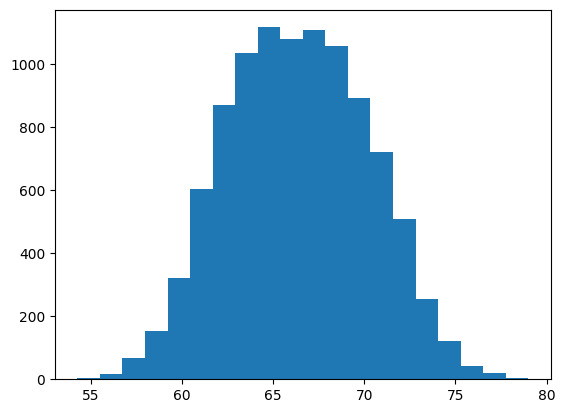

In [9]:
plt.hist(df.Height, bins=20)

# Identify and Remove Outliers|

upper limit = mean + 3*std deviation

lower limit = mean - 3*std deviation

In [15]:
upper_limit = df.Height.mean() + 3 * df.Height.std()
lower_limit = df.Height.mean() - 3 * df.Height.std()

# check outliers
df[(df.Height < lower_limit) | (df.Height > upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [17]:
df_outliers = df[(df.Height < lower_limit) | (df.Height > upper_limit)]

# Z Score 

Indicates how many std deviations away a data point is

Mathematical formula:


(x - mean) / std deviation

In [38]:
df['Z-Score'] = (df.Height - df.Height.mean()) / df.Height.std()

In [39]:
df.head(10)

,Gender,Height,Weight,Z-Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
5,Male,67.253016,152.212156,0.230136
6,Male,68.785081,183.927889,0.628331
7,Male,68.348516,167.971110,0.514865
8,Male,67.018950,175.929440,0.169301
9,Male,63.456494,156.399676,-0.756607


In [40]:
df[(df['Z-Score'] < -3) | (df['Z-Score'] > 3)]

,Gender,Height,Weight,Z-Score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [41]:
df_outliers = df[(df['Z-Score'] < -3) | (df['Z-Score'] > 3)]

In [42]:
len(df_outliers)

7

In [46]:
df[(df['Z-Score'] > -3 ) & (df['Z-Score'] < 3)]

,Gender,Height,Weight,Z-Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [49]:
df_no_outliers = df[(df['Z-Score'] > -3 ) & (df['Z-Score'] < 3)]

In [50]:
df_no_outliers 

,Gender,Height,Weight,Z-Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090
